In [69]:
import numpy as np
from mp_api.client import MPRester
from pymatgen.analysis.diffraction.xrd import *

In [70]:
mp_key = "5KTRCxoFyWvECvvRVCS0OeflSzkuO7df"
mp_id = "mp-7575"

In [71]:
with MPRester(mp_key) as m:
    prim_struc = m.get_structure_by_material_id(mp_id)
    conv_struc = SpacegroupAnalyzer(prim_struc).get_conventional_standard_structure()

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Dans cette tâche, nous allons calculer les 3 premiers pics de diffraction relatifs au LiZnN créés par un rayonnement X incident Cu Kα de longueur d’onde λ=1.54060 Å. Les angles correspondant aux interférences constructives peuvent être trouvés par la loi de Bragg $ 2d_{hkl}\sin(\theta) = n\lambda $.
L'intensité des pics de diffraction dépend du facteur de forme de l'atome (qui dépend de l'angle θ entre la direction incidente de l'onde et la direction d'observation), mais aussi de la multiplicité des plans de réflexion. 
Les pics sont calculés sur base de la maille conventionnelle pour pouvoir comparer avec le diffractogramme de Materials Project.

In [78]:
xrd = XRDCalculator(wavelength = 'CuKa1')
pattern = xrd.get_pattern(conv_struc) 
indices = pattern.hkls

In [79]:
print("Premier pic de diffraction \n")
print('2θ (°) = ', pattern.x[0])
print("Intensité (relative au plus haut pic) = ", pattern.y[0])
print("Indices hkl et multiplicité ", indices[0])
print("Distance interplanaire (Å): ", pattern.d_hkls[0])

Premier pic de diffraction 

2θ (°) =  31.834507004119782
Intensité (relative au plus haut pic) =  99.99999999999999
Indices hkl et multiplicité  [{'hkl': (1, 1, 1), 'multiplicity': 8}]
Distance interplanaire (Å):  2.8086903408110584


In [80]:
print("Deuxième pic de diffraction \n")
print('2θ (°) = ', pattern.x[1])
print("Intensité (relative au plus haut pic) = ", pattern.y[1])
print("Indices hkl et multiplicité ", indices[1])
print("Distance interplanaire (Å): ", pattern.d_hkls[1])

Deuxième pic de diffraction 

2θ (°) =  36.923954175809975
Intensité (relative au plus haut pic) =  43.569983923412174
Indices hkl et multiplicité  [{'hkl': (2, 0, 0), 'multiplicity': 6}]
Distance interplanaire (Å):  2.4323971865063494


In [81]:
print("Troisième pic de diffraction \n")
print('2θ (°) = ', pattern.x[2])
print("Intensité (relative au plus haut pic) = ", pattern.y[2])
print("Indices hkl et multiplicité ", indices[2])
print("Distance interplanaire (Å): ", pattern.d_hkls[2])

Troisième pic de diffraction 

2θ (°) =  53.21119512450196
Intensité (relative au plus haut pic) =  56.358920772256056
Indices hkl et multiplicité  [{'hkl': (2, 2, 0), 'multiplicity': 12}]
Distance interplanaire (Å):  1.719964545117719


On remarque que le premier pic est plus intense que les deux autres représentés. Cela est dû à la diminution du facteur de forme des atomes lorsque $\theta$ augmente. Le troisième pic est plus intense que le second à cause de la multiplicité des plans hkl "de réflexion" égale à 12, alors qu'elle est seulement de 6 pour le second pic.

Graphe représentant les 3 premiers pics de diffraction
On voit que les pics de diffraction correspondent à ceux du Materials Project


<Axes: xlabel='$2\\theta$ ($^\\circ$)', ylabel='Intensities (scaled)'>

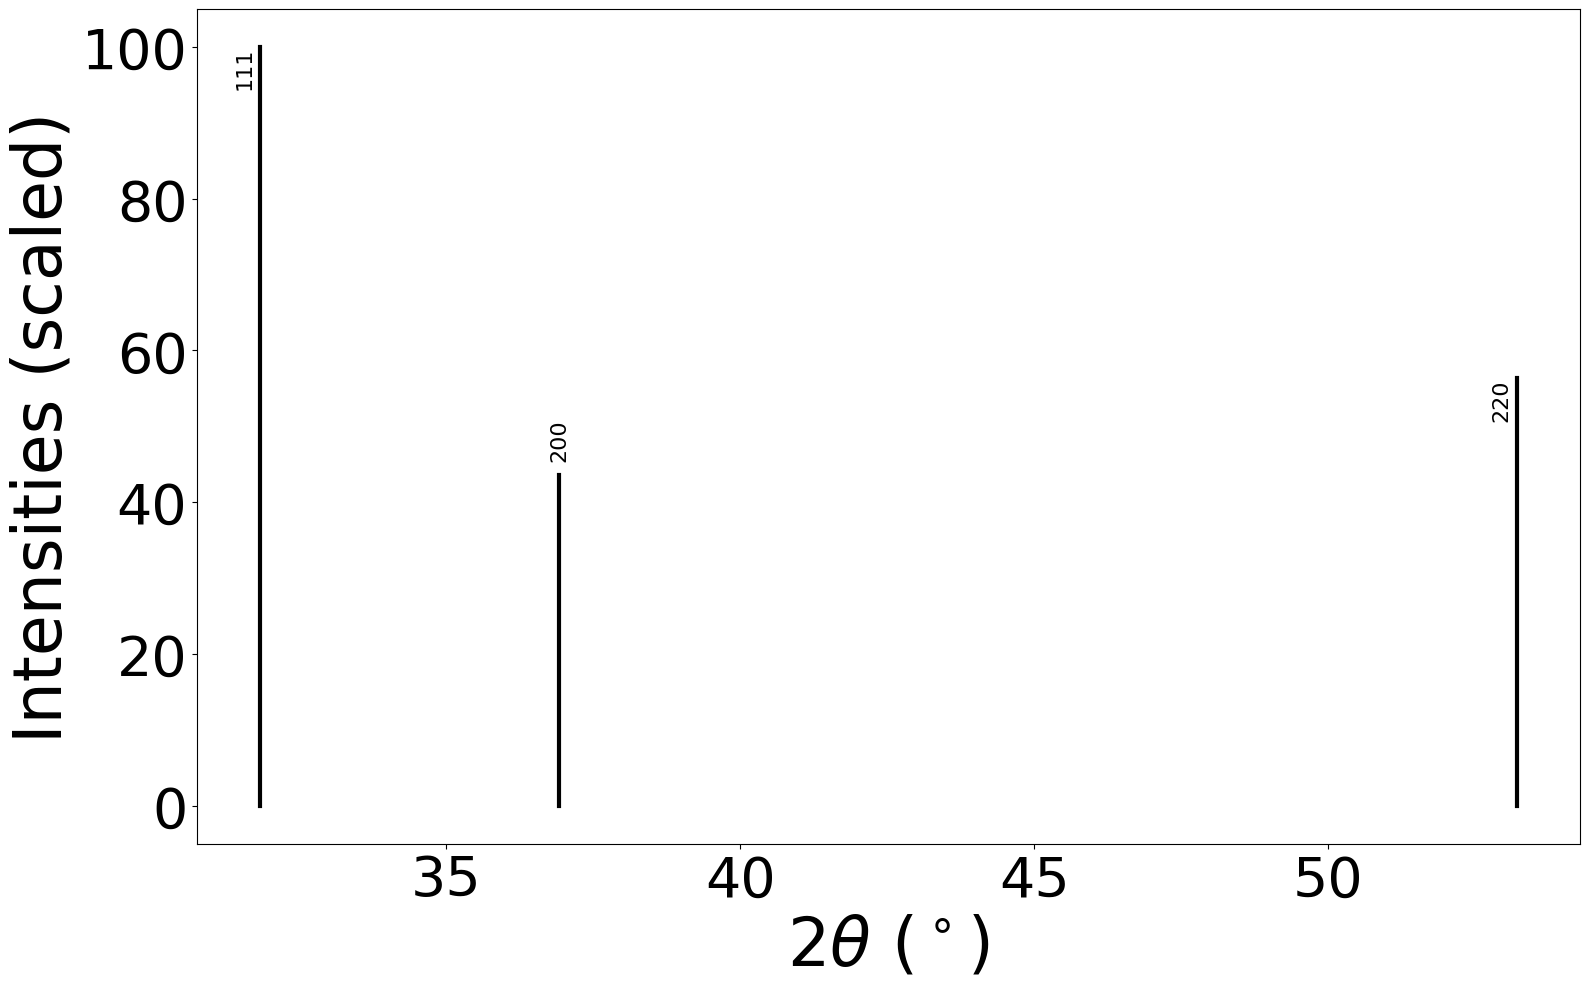

In [82]:
print("Graphe représentant les 3 premiers pics de diffraction")
print("On voit que les pics de diffraction correspondent à ceux du Materials Project")
xrd.get_plot(conv_struc, two_theta_range=(0,54))